In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib as mpl

from functions import Polynomial_Features
from runge_function import Runge_func
from OLS import OLS
from Ridge import Ridge
from LASSO import LASSO
from plotting import set_plot_params

### MSE and $R^2$ as a function of complexity

In [3]:
"""
Generates and saves the MSE for each polynomial degree between degree_min and degree_max.
"""

SAVE_NAME_MSE = "../output/gd_mse_vs_complexity.out"
SAVE_NAME_R2 = "../output/gd_r2_vs_complexity.out"

np.random.seed(2025)

n=1000

degree_min = 1
degree_max = 15

degrees = range(degree_min, degree_max+1)

learning_rate = 0.001
max_its = 10000

x = np.linspace(-1,1, n)

y_true = Runge_func(x)
y_noisy = y_true + np.random.normal(0,0.1, n)


X_unscaled = Polynomial_Features(x, degree_max)

X_train, X_test, y_train, y_test = train_test_split(X_unscaled, y_noisy, test_size = 0.2)

y_mean = y_train.mean()
y_tr_centered = y_train - y_mean


models = [OLS("simple"), Ridge("simple"), LASSO("simple")]

output_mse = np.zeros((len(degrees), len(models)+1), dtype = float)
output_mse[:,0] = degrees

output_r2 = np.zeros((len(degrees), len(models)+1), dtype = float)
output_r2[:,0] = degrees

for i, model in enumerate(models):
    errors = np.zeros_like(degrees, dtype=float)
    r2s = np.zeros_like(degrees, dtype=float)
    for i_deg, deg in enumerate(degrees):
        X_train_deg = X_train[:,:deg]
        X_test_deg = X_test[:,:deg]
        scaler = StandardScaler()
        scaler.fit(X_train_deg)
        X_train_scaled = scaler.transform(X_train_deg)
        X_test_scaled = scaler.transform(X_test_deg)
        # set precision = 0 so that GD never converges and stops at max_iter.
        thetas, its_done, _ = model.fit(X_train_scaled, y_tr_centered, learning_rate = learning_rate ,max_iter = max_its, precision=0)
        predict_test = X_test_scaled @ thetas + y_mean
        errors[i_deg] = mean_squared_error(y_test, predict_test)
        r2s[i_deg] = r2_score(y_test, predict_test)
        #r2s[i_deg] = 1.0 - (np.sum((y_test - predict_test)**2)/(np.sum((y_test - np.mean(y_test))**2)))

    output_mse[:,i+1] = errors
    output_r2[:, i+1] = r2s

header_mse_string = "simple gd MSE, col0 Degree, col1 OLS, col2 Ridge, col3 LASSO."
header_r2_string = "simple gd R^2, col0 Degree, col1 OLS, col2 Ridge, col3 LASSO."

np.savetxt(SAVE_NAME_MSE, output_mse, header = header_mse_string)
np.savetxt(SAVE_NAME_R2, output_r2, header = header_r2_string)

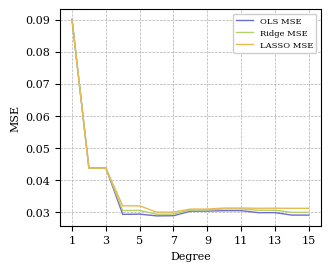

In [4]:
FOLDER = "../figs/"
SAVE_NAME_MSE = "gd_mse_vs_complexity"
FILE_NAME_MSE = "../output/gd_mse_vs_complexity.out"

SAVE_NAME_R2 = "gd_r2_vs_complexity"
FILE_NAME_R2 = "../output/gd_r2_vs_complexity.out"

SAVE_NAME = "gd_mse_r2_vs_complexity"


set_plot_params(1,1)
colors = mpl.color_sequences["tab20b"]

capitalized_labels = [
    "OLS",
    "Ridge",
    "LASSO",
]

mses_data = np.loadtxt(FILE_NAME_MSE, unpack=True)
r2s_data = np.loadtxt(FILE_NAME_R2, unpack=True)

degrees = mses_data[0]
# plot gd mse from saved data
for i, model_name in enumerate(capitalized_labels):
    plt.plot(degrees, mses_data[i+1], label = model_name + " MSE", color = colors[4*i+2])
    
plt.ylabel("MSE")
plt.xlabel("Degree")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15])
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(framealpha=1)
plt.savefig(FOLDER + SAVE_NAME_MSE + ".pdf")
plt.show()

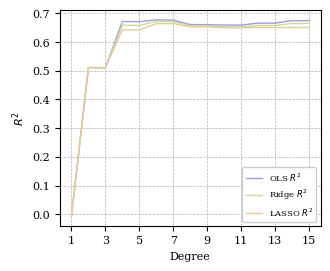

In [5]:
FOLDER = "../figs/"

SAVE_NAME_R2 = "gd_r2_vs_complexity"
FILE_NAME_R2 = "../output/gd_r2_vs_complexity.out"


set_plot_params(1,1)
colors = mpl.color_sequences["tab20b"]

capitalized_labels = [
    "OLS",
    "Ridge",
    "LASSO",
]

mses_data = np.loadtxt(FILE_NAME_MSE, unpack=True)
r2s_data = np.loadtxt(FILE_NAME_R2, unpack=True)

degrees = mses_data[0]
# plot gd r2 from saved data
for i, model_name in enumerate(capitalized_labels):
    plt.plot(degrees, r2s_data[i+1], label = model_name + r" $R^2$", linestyle="-", color=colors[4*i+3])

plt.ylabel(r"$R^2$")
plt.xlabel("Degree")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15])
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(framealpha=1)
plt.savefig(FOLDER + SAVE_NAME_R2 + ".pdf")
plt.show()